In [1]:
from __future__ import print_function
__author__= 'fbb'
__contributor__ = 'eep'
import numpy as np
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Universal Variables

In [2]:
distributions = ['chisq', 'norm', 'pois', 'binomial','negbinomial']

In [3]:
np.random.seed(171)
md ={}
mymean = 100
mystd = 30
mysize = (np.random.rand(100) * 2000).astype(int)
print(mysize, mysize.shape)

[1315 1768 1177 1639  454  315 1223 1304 1206 1400  395  330  117 1522  640
  472  717 1072 1654  109 1678  100 1585  275  442 1996  222  272 1700   37
  379 1206  658  958 1360  499 1433  775  389 1824 1692 1516 1973  191 1182
 1433 1334  754 1691 1492  156 1979  611  532 1945  189 1820 1065 1131 1088
 1706 1195 1271 1673 1431   51  590 1924 1300  452 1672 1875 1180 1516 1851
  652   94  298  136  598  283   50  261 1510  364 1550 1962  119  785 1863
 1896 1251  123  579  942  438 1536  421  845 1742] (100,)


# Chi Squared Distribution

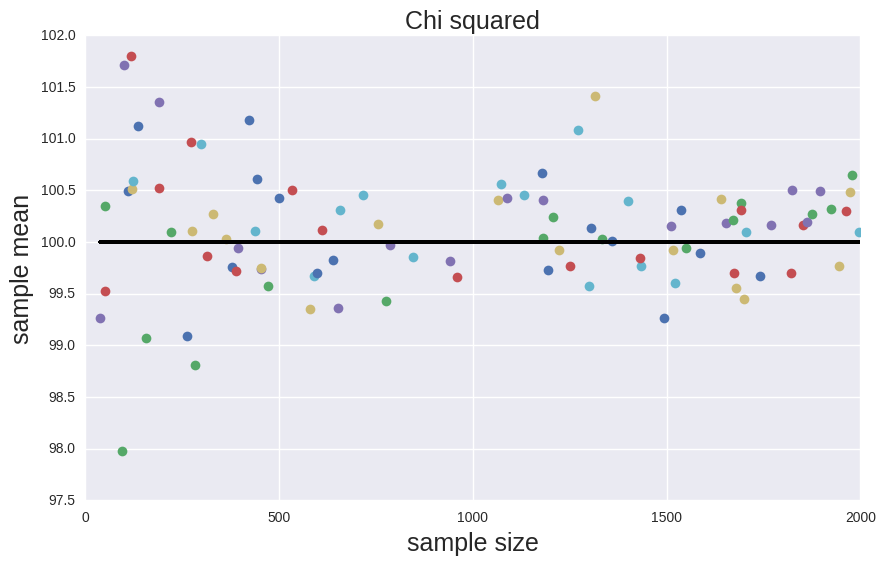

In [4]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(mymean, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean], 'k')

# **Start normal distribution:**

md['norm'] = np.random.normal(0, size =100)
pl.hist(md['norm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

print("Normal mean: %.2f, standard deviation: %.2f"%(md['norm'].mean(), md['norm'].std()))

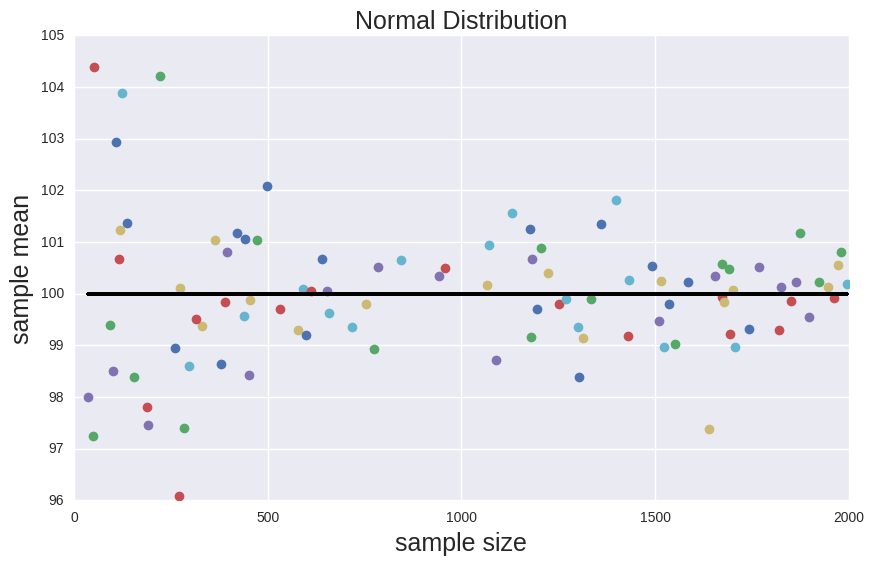

In [5]:
np.random.seed(150)
md['norm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['norm'][n] = np.random.normal(mymean, mystd, size = n)
    
# save the means for plotting later    

md['norm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal Distribution', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# Poisson Distribution

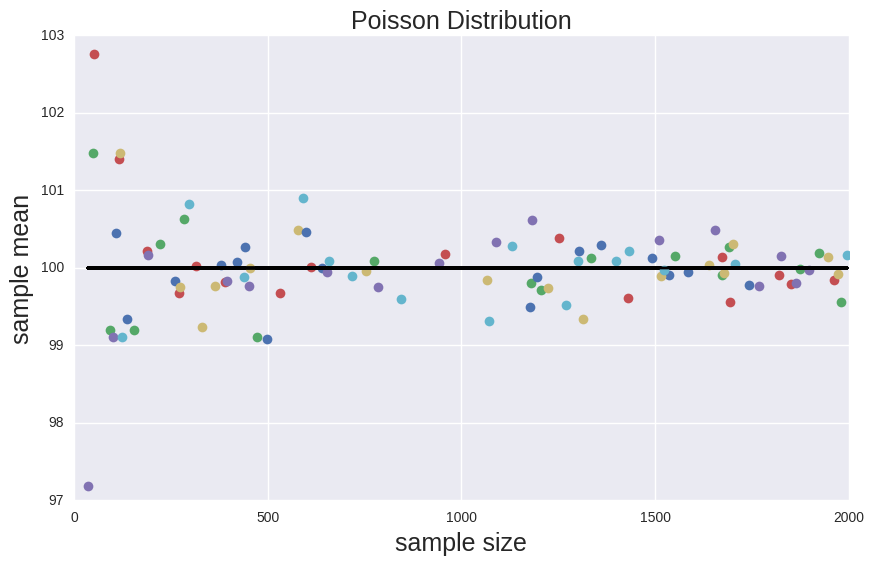

In [6]:
np.random.seed(100)
md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(mymean, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# Binomial Distribution

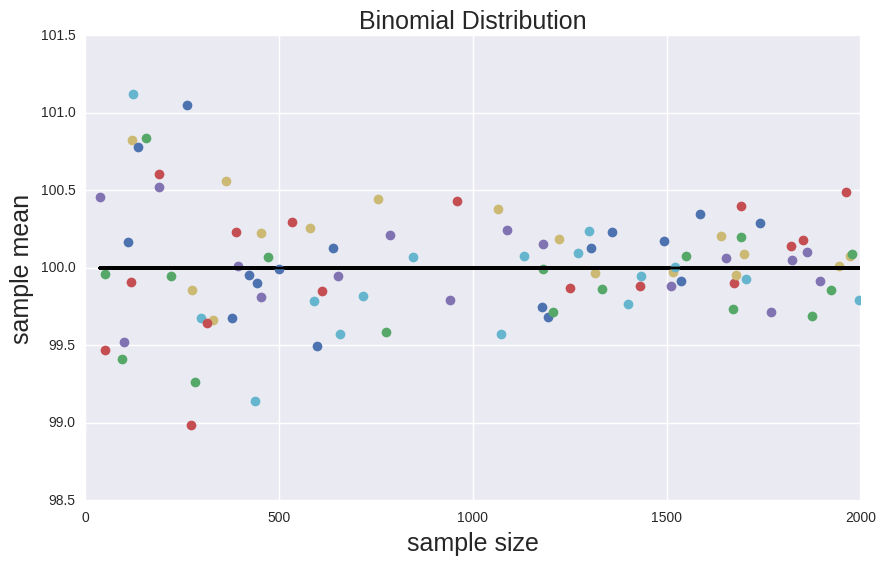

In [7]:
np.random.seed(100)
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(n = 200 , p = 0.5 , size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# Exponential Distribution

np.random.seed(100)
md['exponential'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['exponential'][n] = np.random.exponential(scale = (1/mymean) , size = n)
    
# save the means for plotting later    

md['exponential']['means'] = {}
axexpo_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exponential']:
    if not type(nn) == str:
        md['exponential']['means'][nn] = md['exponential'][nn].mean()
        #and plot it
        axexpo_mu_n.plot(nn, md['exponential']['means'][nn], 'o')
        axexpo_mu_n.set_xlabel('sample size', fontsize=18)
        axexpo_mu_n.set_ylabel('sample mean', fontsize=18)
        axexpo_mu_n.set_title('Exponential Distribution', fontsize=18)
        axexpo_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# Inverse Gaussian ( Wald)

In [8]:
np.random.wald?

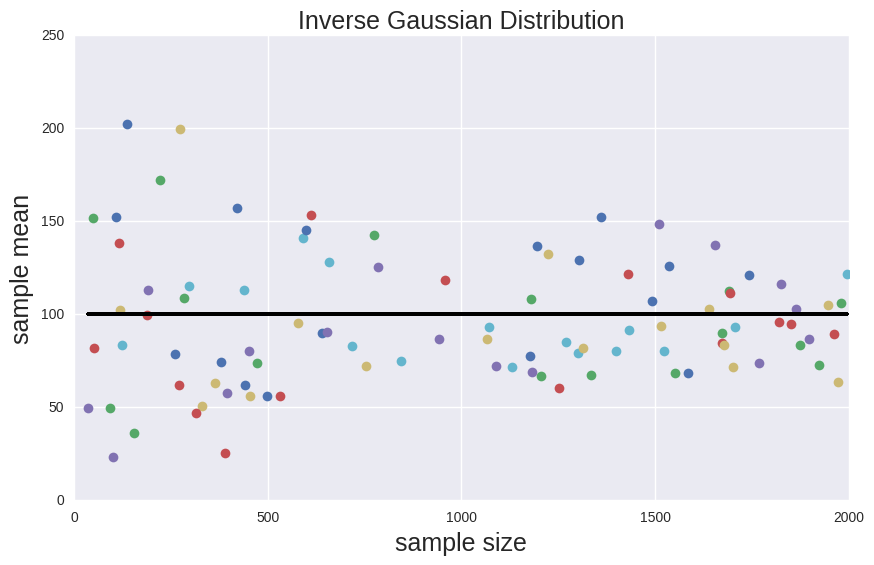

In [9]:
np.random.seed(100)
md['ingau'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['ingau'][n] = np.random.wald(mymean,1, size = n)
    
# save the means for plotting later    

md['ingau']['means'] = {}
axexpo_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['ingau']:
    if not type(nn) == str:
        md['ingau']['means'][nn] = md['ingau'][nn].mean()
        #and plot it
        axexpo_mu_n.plot(nn, md['ingau']['means'][nn], 'o')
        axexpo_mu_n.set_xlabel('sample size', fontsize=18)
        axexpo_mu_n.set_ylabel('sample mean', fontsize=18)
        axexpo_mu_n.set_title('Inverse Gaussian Distribution', fontsize=18)
        axexpo_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# Histogram

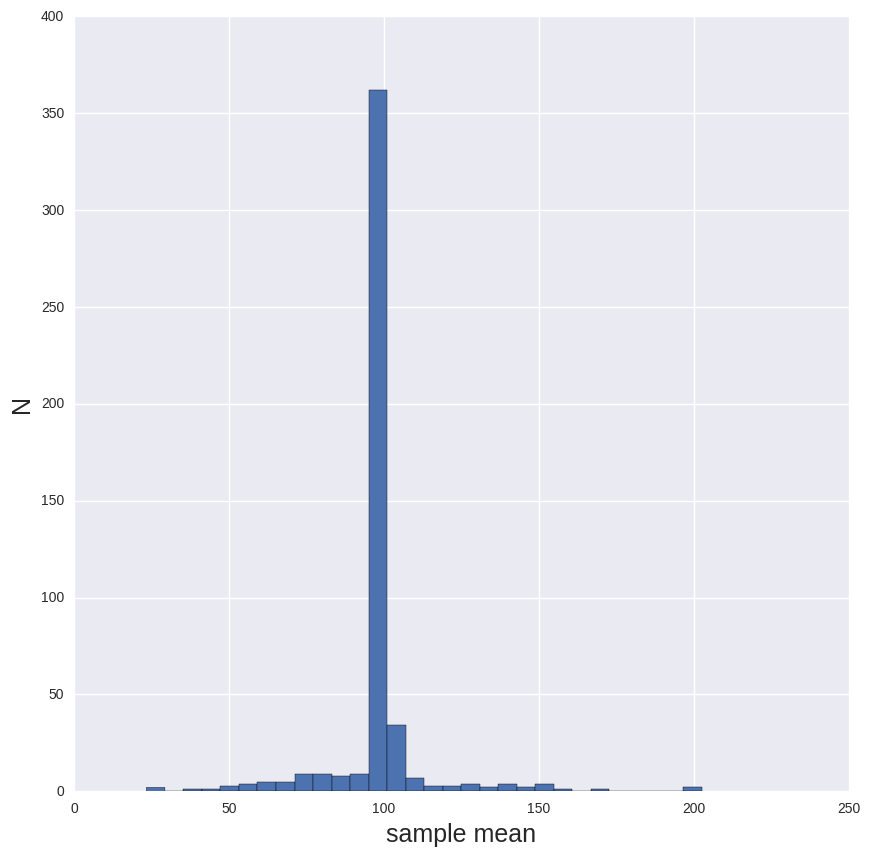

In [10]:
allmeans = list(md['chisq']['means'].values() + md['norm']['means'].values()
               + md['pois']['means'].values() + md['ingau']['means'].values()
               + md['binomial']['means'].values())
                

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)